<a href="https://colab.research.google.com/github/manish-gitx/ml_assignment/blob/main/manish_jamboore_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import essential libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset


In [ ]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
df = pd.read_csv('/content/Jamboree.csv')


Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 42.1MB/s]


# Drop 'Serial No.' as it is not relevant for the model


In [ ]:
df.drop(columns=['Serial No.'], inplace=True)


# Exploratory Data Analysis


In [ ]:
print("Shape of the dataset:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())

Shape of the dataset: (500, 8)
Data types:
 GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object
Missing values:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


# Basic Visualizations: Univariate Analysis


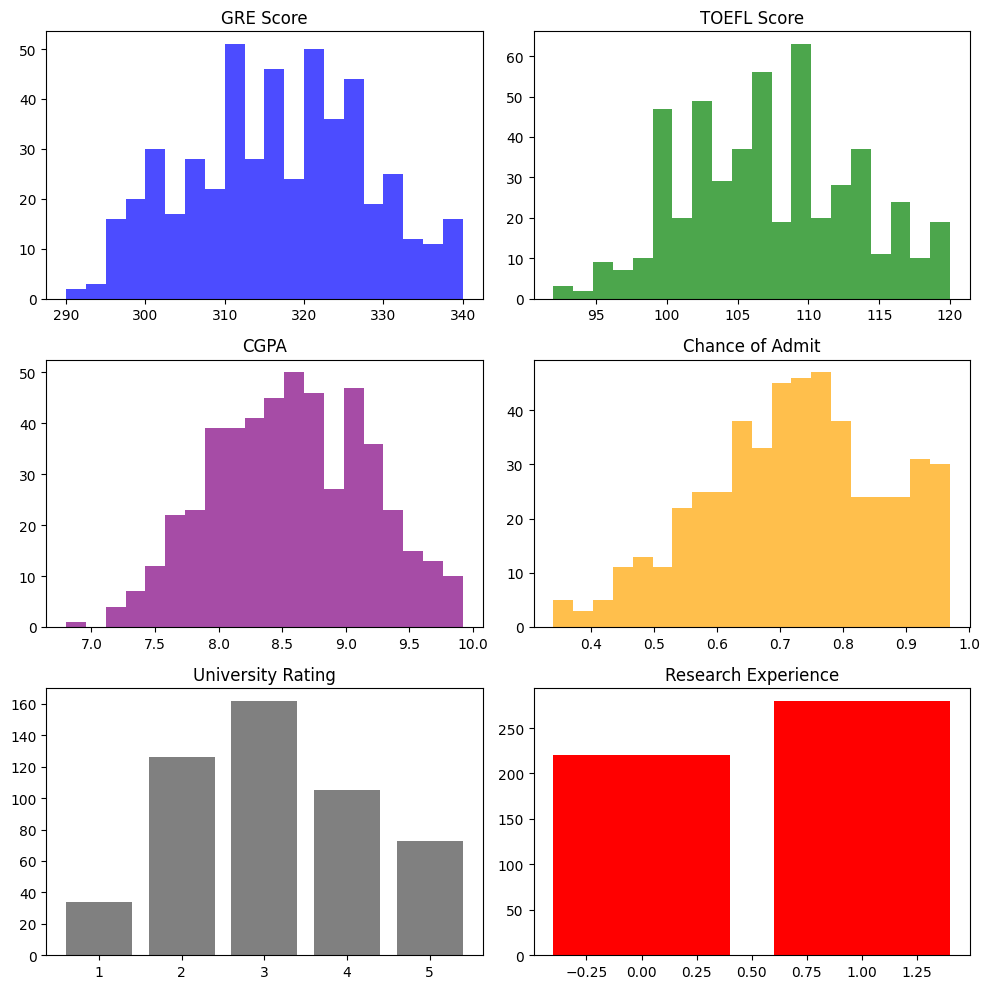

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1); plt.hist(df['GRE Score'], bins=20, color='blue', alpha=0.7); plt.title('GRE Score')
plt.subplot(3, 2, 2); plt.hist(df['TOEFL Score'], bins=20, color='green', alpha=0.7); plt.title('TOEFL Score')
plt.subplot(3, 2, 3); plt.hist(df['CGPA'], bins=20, color='purple', alpha=0.7); plt.title('CGPA')
plt.subplot(3, 2, 4); plt.hist(df['Chance of Admit '], bins=20, color='orange', alpha=0.7); plt.title('Chance of Admit')
plt.subplot(3, 2, 5); plt.bar(df['University Rating'].value_counts().index, df['University Rating'].value_counts().values, color='gray'); plt.title('University Rating')
plt.subplot(3, 2, 6); plt.bar(df['Research'].value_counts().index, df['Research'].value_counts().values, color='red'); plt.title('Research Experience')
plt.tight_layout()
plt.show()

# Correlation Matrix


In [ ]:
correlation = df.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                    GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0

# Bivariate Scatterplots


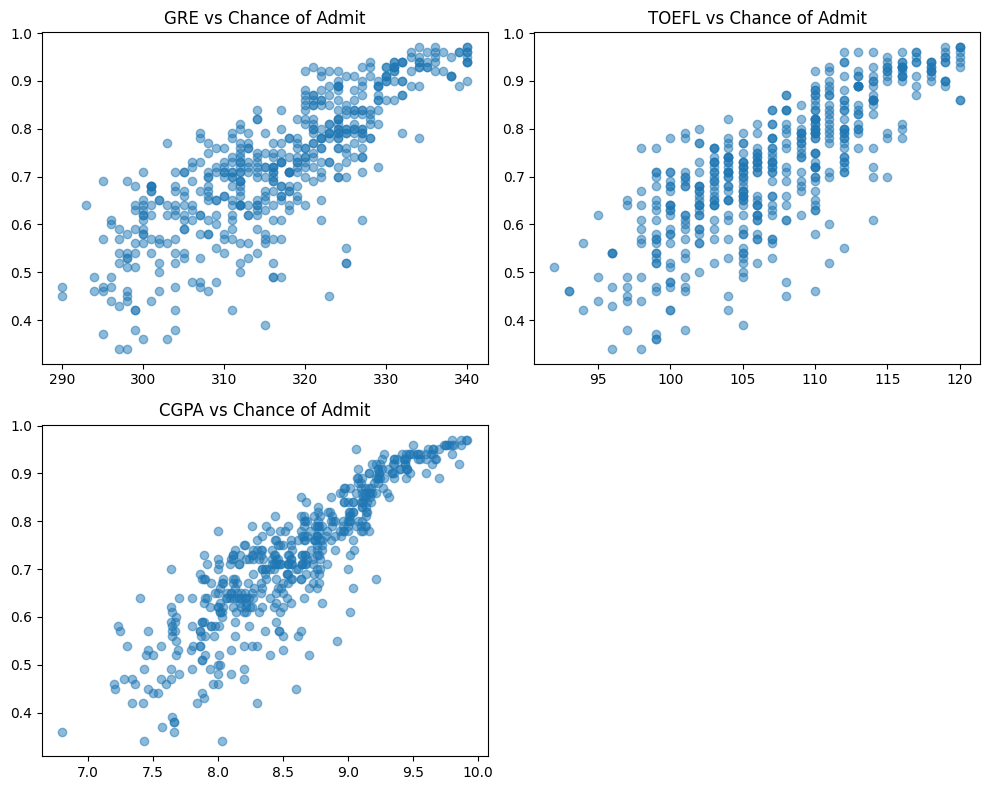

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1); plt.scatter(df['GRE Score'], df['Chance of Admit '], alpha=0.5); plt.title('GRE vs Chance of Admit')
plt.subplot(2, 2, 2); plt.scatter(df['TOEFL Score'], df['Chance of Admit '], alpha=0.5); plt.title('TOEFL vs Chance of Admit')
plt.subplot(2, 2, 3); plt.scatter(df['CGPA'], df['Chance of Admit '], alpha=0.5); plt.title('CGPA vs Chance of Admit')
plt.tight_layout()
plt.show()


# Remove duplicates


In [ ]:
df.drop_duplicates(inplace=True)


# Splitting Data into Features and Target


In [ ]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']


# Train-Test Split (manual split to avoid additional imports)


In [ ]:
split_idx = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


# Fit Linear Regression Model (Manual Calculation)


In [ ]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Calculate coefficients using Normal Equation


In [ ]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train


# Predictions


In [ ]:
y_pred = X_test @ theta


# Model Evaluation


In [ ]:
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0018431744376051142
R-squared: 0.8982869098533652


# Assumption Testing: Residual Analysis


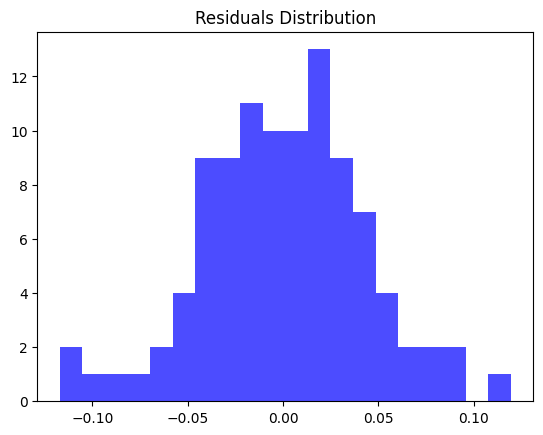

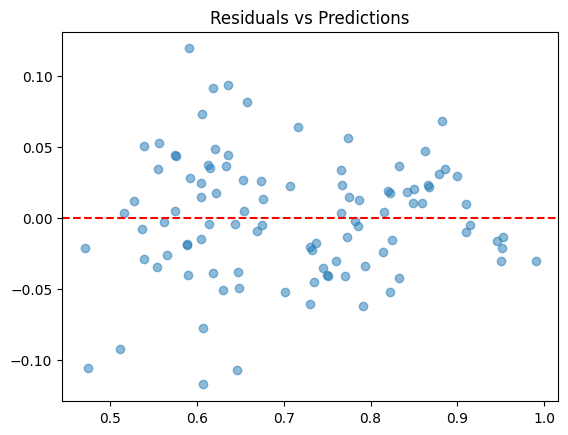

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title("Residuals Distribution")
plt.show()

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.show()

# Adjusted R-squared


In [ ]:
n, p = X_test.shape
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adj_r2}")

Adjusted R-squared: 0.8893450997305842
